# Import Section
Mengimport library - library yang dibutuhkan. dimana kita menggunakan Pandas untuk object data pandas.Dataframe, Numpy untuk object data np.array. itertools untuk melakukan iterasi khusus, scikit-learn untuk model Clustering dan alat Testing scorenya

In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
import itertools


from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

# Read Data
dengan menggunakan pandas.read_csv() kita membaca file csv dan mengubahnya menjadi pd.DataFrame

In [2]:
df = pd.read_csv("ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,sam
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,1
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,1
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,1
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,1


# Beberapa Notes untuk Kolom dataset tersebut adalah: 
1. work_year: Tahun dimana gajinya telah diberikan
2. experience_level: level experience / pengalaman dalam bidang pekerjaan
    field_value: {
        EN: Entry level                 1
        MI: Junior Mid Level            2
        SE: Intermediate Senior Level   3
        EX: Expert Executive Level      4
    }
3. employement_type: Tipe pekerja
    field_value: {
        PT: kerja paruh waktu           4
        FT: kerja fulltime              3
        CT: contract                    2
        FL: Freelance                   1
}
4. job_title: Job Title
5. salary: nilai gaji
6. salary_currency: nilai gaji tersebut dalam mata uang apa
7. salary_in_usd: gaji jika di ubah menjadi mata uang dollar
8. employee_residence: lokasi asal dari pekerja
9. remote_ratio: rasio pekerja bekerja secara jarak jauh
10. company_location: lokasi perusahaan pekerja
11. company_size: ukuran dari perusahaan berdasarkan dari jumlah pekerja di sana
    field_value{
        S: small (x<50),
        M: medium (50<=x<250),
        L: large (x>250),
}

# PreProcessing
Menghapus Outlier dengan Quartile dan Interquartile

In [ ]:

q1 = df["salary_in_usd"].quantile(0.25) # Quartile 1
q2 = df["salary_in_usd"].quantile(0.5) # Quartile 1
q3 = df["salary_in_usd"].quantile(0.75) # Quartile 3
iqr = q3-q1 # Inter Quartile Range

low_lim = q1 - (1.5*iqr)
hi_lim = q3 + (1.5*iqr)
print(f"Quartile 1: {q1}, Median: {q2}, Quartile 3: {q3}, Interquartile: {iqr}")
print(f"{low_lim}, {hi_lim}")

for i in range(len(df["salary_in_usd"])):
    if hi_lim < df["salary_in_usd"][i]:
        df = df.drop([i])

df = df.reset_index()


Quartile 1: 62726.0, Median: 101570.0, Quartile 3: 150000.0, Interquartile: 87274.0
-68185.0, 280911.0


Mengubah Data Ordinal Menjadi Numerik

In [4]:
df["company_size"] = df["company_size"].apply(lambda x: 1 if x == "S" else x)
df["company_size"] = df["company_size"].apply(lambda x: 2 if x == "M" else x)
df["company_size"] = df["company_size"].apply(lambda x: 3 if x == "L" else x)



df["experience_level"] = df["experience_level"].apply(lambda x: 1 if x == "EN" else x)
df["experience_level"] = df["experience_level"].apply(lambda x: 2 if x == "MI" else x)
df["experience_level"] = df["experience_level"].apply(lambda x: 3 if x == "SE" else x)
df["experience_level"] = df["experience_level"].apply(lambda x: 4 if x == "EX" else x)

df["employment_type"] = df["employment_type"].apply(lambda x: 4 if x == "FT" else x)
df["employment_type"] = df["employment_type"].apply(lambda x: 3 if x == "PT" else x)
df["employment_type"] = df["employment_type"].apply(lambda x: 2 if x == "CT" else x)
df["employment_type"] = df["employment_type"].apply(lambda x: 1 if x == "FL" else x)

Test pada Whisker Plot

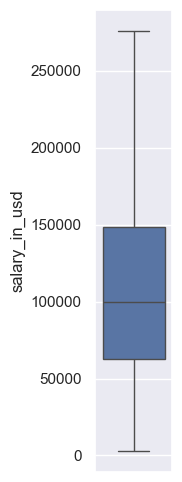

In [5]:
sbn.set(rc={'figure.figsize':(1,6)})
df = df.drop(columns=["index", "Unnamed: 0"])
df=df.drop(columns=['salary_currency', 'sam', 'salary'])
ax = sbn.boxplot(data=df["salary_in_usd"])
ax.tick_params(axis="x", rotation=270)

# Penjelasan:
dari Whisker Plot tersebut, kita mendapatkan informasi tentang median, Quartile 1, Quartile 3, Interquartile, Max Value, dan Min Value nya berupa:
- Quartile 1: 62,726.0,
- Median: 101,570.0,
- Quartile 3: 150,000.0,
- Interquartile: 87,274.0
- Min: -68,185.0, 
- Max: 280,911.0

# Visualisasi

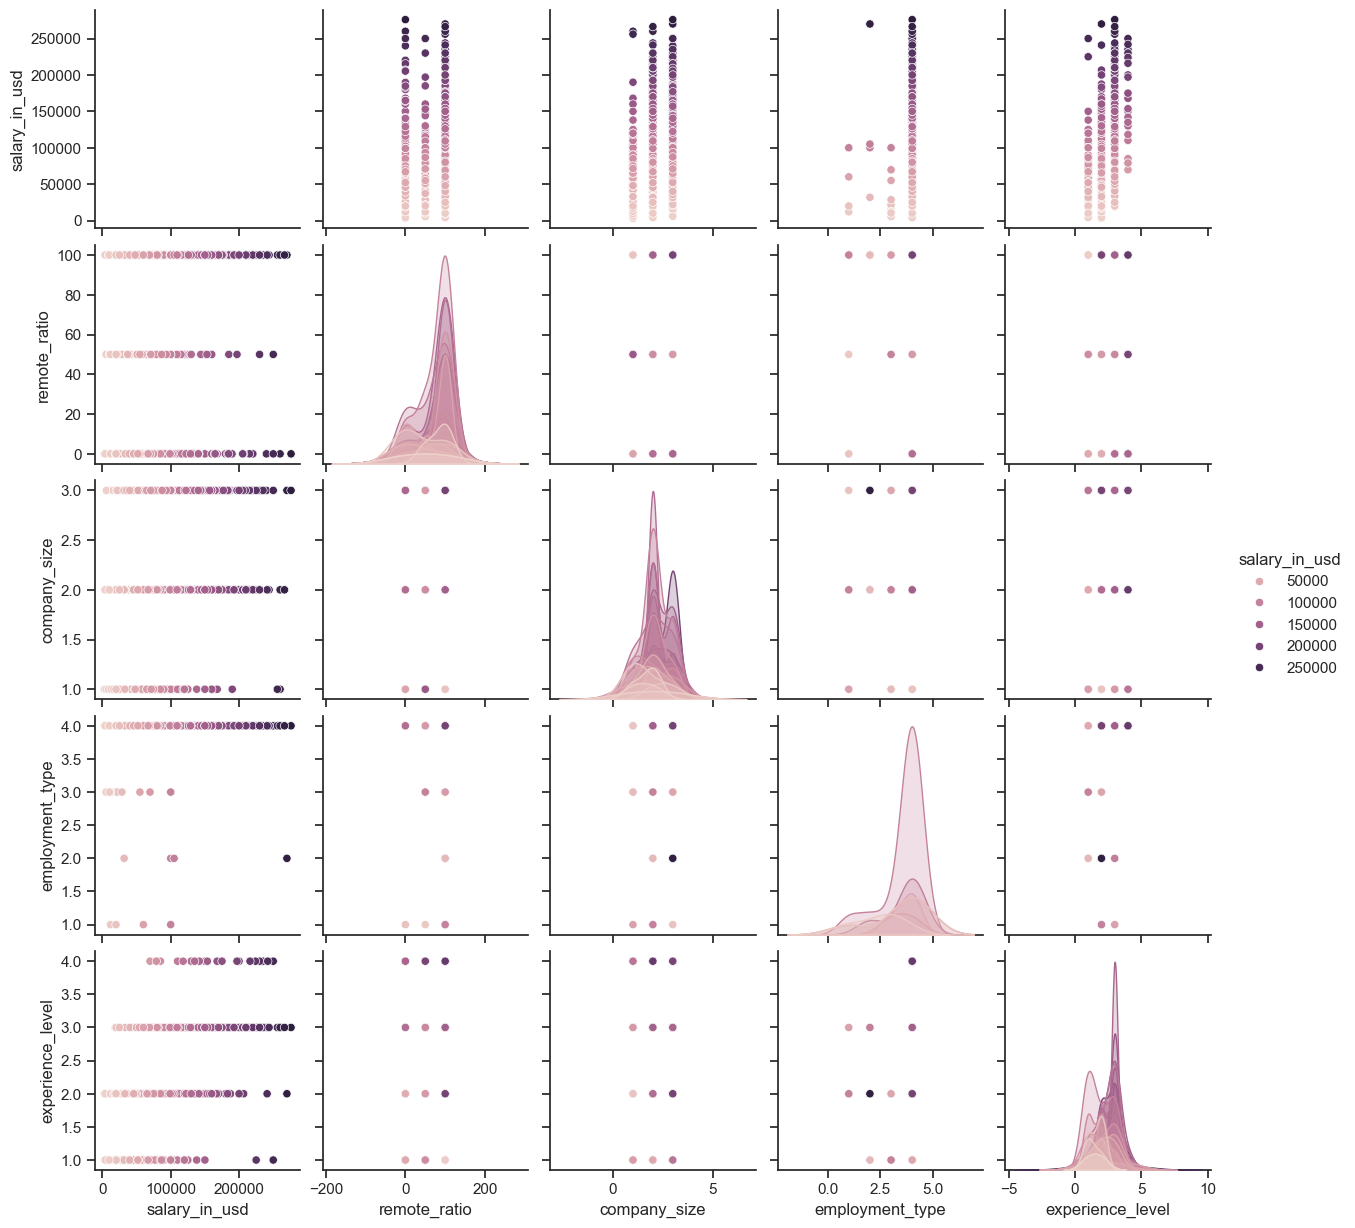

In [6]:
sbn.set(style='ticks', color_codes=True)
sbn.pairplot(df, vars=["salary_in_usd", "remote_ratio", "company_size", "employment_type", "experience_level"], hue='salary_in_usd')

# Penjelasan:
dari Pairplot diatas, maka kita mendapatkan beragam plot yang menunjukkan nilai - nilai tertentu.
- dari data ini kita dapat mengetahui jika Salary (in USD) [Gaji (dalam USD)] paling tinggi terletak pada seseorang dengan Experience Level 3 (SE, Intermediate Senior Level)
- dari data ini juga kita dapat mengetahui bahwa rata - rata pekerja dengan tipe selain pekerja paruh waktu menerima gaji yang lebih sedikit
- dan dari data tersebut kita dapat mengetahui bahwa individu yang bekerja secara online 100 persen bisa memiliki gaji yang lebih banyak dari yang setengah online dan setengah offline

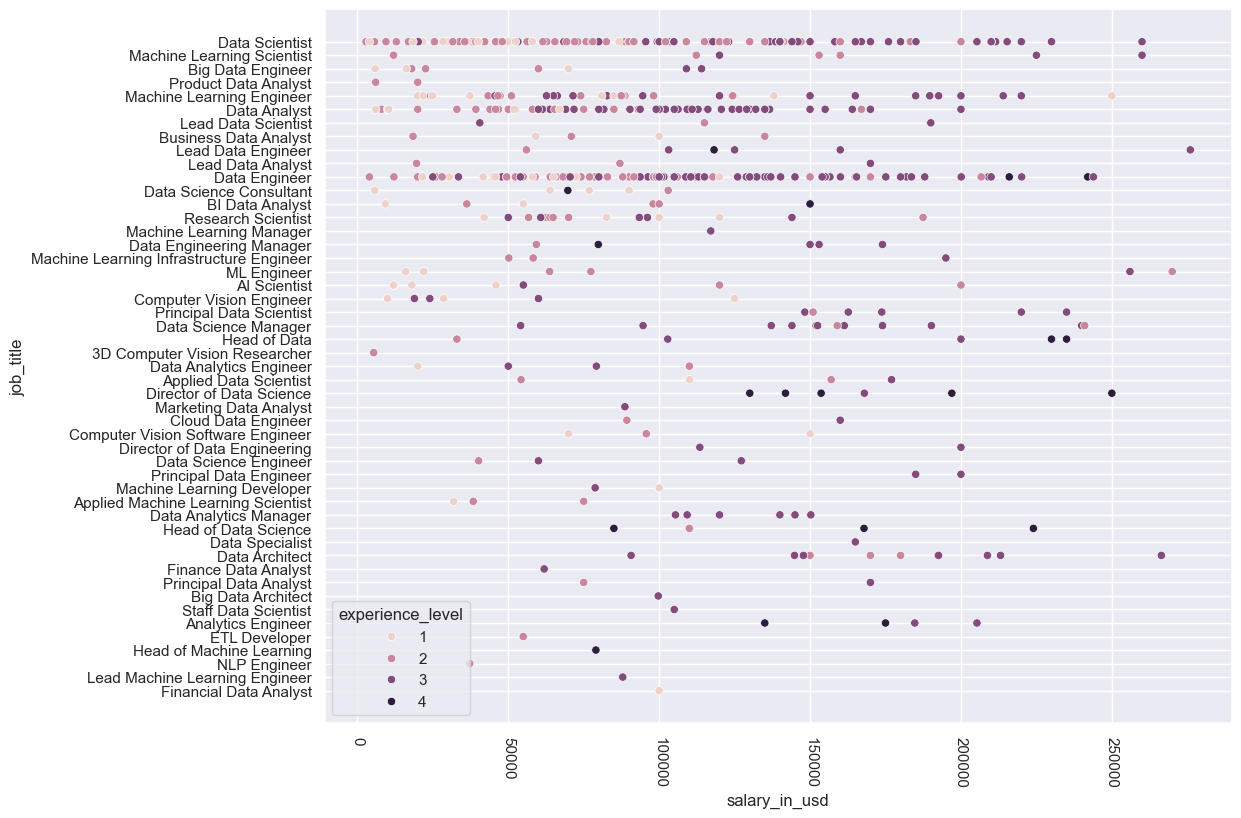

In [7]:
sbn.set(rc={'figure.figsize':(11.7,9.27)})
ax = sbn.scatterplot(df, y=df["job_title"], x=df["salary_in_usd"], hue=df["experience_level"])
ax.tick_params(axis="x", rotation=270)

# Penjelasan
plot tersebut menunjukkan distribusi berdasarkan Pekerjaan dan Gaji (dalam USD) dari setiap Pekerjaan - Pekerjaan yang tersedia

# Korelasi

Mengubah kategorikal menjadi numerik untuk melakukan Perhitungan Korelasi

In [8]:
jub = pd.DataFrame(df["job_title"])
num_now = 1
literal = {}
go_get_job = []

for i in range(len(df["job_title"])):
    if df["job_title"][i] not in go_get_job:
        go_get_job.append(df["job_title"][i])
        literal[df["job_title"][i]] = num_now
        df.loc[i, "job_title"] = num_now
        num_now += 1
    else:
        df.loc[i, "job_title"] = literal[df["job_title"][i]]

huhu = pd.DataFrame(literal, index=[0])
huhu


,Data Scientist,Machine Learning Scientist,Big Data Engineer,Product Data Analyst,Machine Learning Engineer,Data Analyst,Lead Data Scientist,Business Data Analyst,Lead Data Engineer,Lead Data Analyst,...,Finance Data Analyst,Principal Data Analyst,Big Data Architect,Staff Data Scientist,Analytics Engineer,ETL Developer,Head of Machine Learning,NLP Engineer,Lead Machine Learning Engineer,Financial Data Analyst
0,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49


In [9]:
num_now = 1
literal = {}
go_get_job = []

for i in range(len(df["employee_residence"])):
    if df["employee_residence"][i] not in go_get_job:
        go_get_job.append(df["employee_residence"][i])
        literal[df["employee_residence"][i]] = num_now
        df.loc[i, "employee_residence"] = num_now 
        num_now += 1
    else:
        df.loc[i, "employee_residence"] = literal[df["employee_residence"][i]]

huhu = pd.DataFrame(literal, index=[0])
huhu

,DE,JP,GB,HN,US,HU,NZ,FR,IN,PK,...,CZ,AR,DZ,TN,MY,EE,AU,BO,IE,CH
0,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57


In [10]:
num_now = 1
literal = {}
go_get_job = []

for i in range(len(df["company_location"])):
    if df["company_location"][i] not in go_get_job:
        go_get_job.append(df["company_location"][i])
        literal[df["company_location"][i]] = num_now
        df.loc[i, "company_location"] = num_now
        num_now += 1
    else:
        df.loc[i, "company_location"] = literal[df["company_location"][i]]
huhu = pd.DataFrame(literal, index=[0])
huhu

,DE,JP,GB,HN,US,HU,NZ,FR,IN,PK,...,CH,VN,AS,TR,CZ,DZ,EE,MY,AU,IE
0,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50


Melakukan Perhitungan Korelasi

In [11]:
corel = df.corr(method='pearson')
corel

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.309448,0.094541,0.025707,0.266883,-0.097399,0.075312,-0.085805,-0.074459
experience_level,0.309448,1.000000,0.119657,0.166615,0.524220,-0.156212,0.086006,-0.184308,0.060978
employment_type,0.094541,0.119657,1.000000,-0.056229,0.116439,-0.128545,-0.016704,-0.044525,0.028103
job_title,0.025707,0.166615,-0.056229,1.000000,0.136846,0.068265,0.064228,0.022817,0.068076
salary_in_usd,0.266883,0.524220,0.116439,0.136846,1.000000,-0.322982,0.134026,-0.342294,0.127788
employee_residence,-0.097399,-0.156212,-0.128545,0.068265,-0.322982,1.000000,0.013824,0.766736,-0.068355
remote_ratio,0.075312,0.086006,-0.016704,0.064228,0.134026,0.013824,1.000000,-0.015529,-0.028706
company_location,-0.085805,-0.184308,-0.044525,0.022817,-0.342294,0.766736,-0.015529,1.000000,0.005655
company_size,-0.074459,0.060978,0.028103,0.068076,0.127788,-0.068355,-0.028706,0.005655,1.000000


menunjukkan Hasil Korelasi dalam bentuk Heatmap

<Axes: >

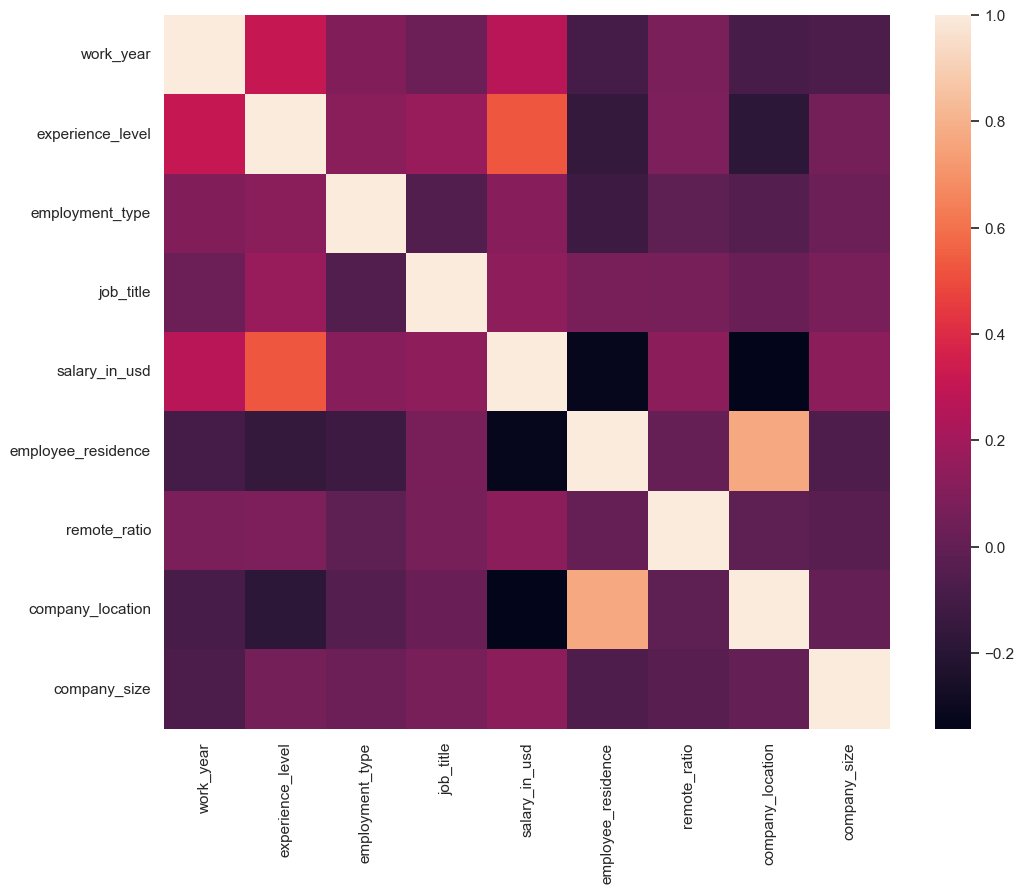

In [12]:
sbn.heatmap(corel, xticklabels=corel.columns, yticklabels=corel.columns)

# Penjelasan:
Dari Plot Heatmap Tersebut, kita mendapati jika hasil dari perhitungan Korelasi tersebut menunjukkan jika terdapat beberapa hubungan antara
- Experience level [level pengalaman] - Work Year [Tahun mulai bekerja] dengan nilai dikisaran 0.3
- Salary (in Usd) [Gaji (dalam USD)] - Experience level [level pengalaman] dengan nilai dikisaran 0.6

In [13]:
df["salar"] = df['salary_in_usd'].apply(lambda x: 1 if x < 30000 else (2 if 30000 < x < 60000 else (3 if 60000 < x < 90000 else (4 if 90000 < x < 120000 else (5 if 120000 < x < 150000 else (6 if 150000 < x < 180000 else (7 if 180000 < x < 210000 else (8 if 210000 < x < 240000 else 9))))))))
df #ini untuk mengkategorikan gajinya

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salar
0,2020,2,4,1,79833,1,0,1,3,3
1,2020,3,4,2,260000,2,0,2,1,9
2,2020,3,4,3,109024,3,50,3,2,4
3,2020,2,4,4,20000,4,0,4,1,1
4,2020,3,4,5,150000,5,50,5,3,9
...,...,...,...,...,...,...,...,...,...,...
592,2022,3,4,11,154000,5,100,5,2,6
593,2022,3,4,11,126000,5,100,5,2,5
594,2022,3,4,6,129000,5,0,5,2,5
595,2022,3,4,6,150000,5,100,5,2,9


# Clustering

Uji Parameter Terbaik

In [24]:
epsilon = np.linspace(0.01, 1, num=15)
epsilon

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [25]:
min_samp = np.arange(2,20, step=3)
combinator = list(itertools.product(epsilon, min_samp))
n = len(combinator)
combinator

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

Mengambil Data yang akan di jadikan Patokan Clustering dan Mengubahnya menjadi numpy.array object

In [ ]:
#X = np.array(df[["experience_level", "work_year"]])
#X = np.array(df[["salar", "experience_level", "work_year"]])
X = np.array(df[["experience_level"]])
X

array([[4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [1],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [3],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
    

In [34]:
def max_parameter(combinator, X_val):
    score = []
    all_label_list = []

    for i, (eps, num_samp) in enumerate(combinator):
        dbscan_clust_mod = DBSCAN(eps=eps, min_samples= num_samp).fit(X_val)
        labels = dbscan_clust_mod.labels_
        labels_set = set(labels)
        num_clust = len(labels_set)

        if -1 in labels_set: #mengurangi Noise nya (-1)
            num_clust -= 1
        
        if (num_clust < 2) or (num_clust > 50): #mengurangi nilai yang tidak masuk akal
            score.append(-10)
            all_label_list.append('bad')
            c = (eps, num_samp)
            continue
        score.append(ss(X, labels))
        all_label_list.append(labels)

    best_index = np.argmax(score)
    best_parameter = combinator[best_index]
    best_label = all_label_list[best_index]
    best_score = score[best_index]

    return {'Best Epsilon': best_parameter,
            'best_min_sample': best_parameter[1],
            'best_label': best_label,
            'best_score': best_score}

In [35]:
y = np.array(df["salary_in_usd"]).reshape(-1,1)
bestofthebest = max_parameter(combinator,X)

for i in bestofthebest:
    print(f"{i}: {bestofthebest[i]}")

Best Epsilon: (0.01, 2)
best_min_sample: 2
best_label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 

# Implementasi:
Menggunakan model Density-Based Spatial Clustering of Applications with Noise

dimana kita menggunakan parameter yang menggunakan Epsilon dan minimal sample sesuai dari hasil perhitungan yang terbaik di fungsi yang sebelumnya

In [47]:
dbss = DBSCAN(eps=0.01, min_samples=2).fit(X, y)

Menyimpan data Cluster ke dalam pandas.Dataframe utama

In [48]:
df['cluster'] = dbss.labels_
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salar,cluster
0,2020,2,4,1,79833,1,0,1,3,3,0
1,2020,3,4,2,260000,2,0,2,1,9,0
2,2020,3,4,3,109024,3,50,3,2,4,0
3,2020,2,4,4,20000,4,0,4,1,1,0
4,2020,3,4,5,150000,5,50,5,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...
592,2022,3,4,11,154000,5,100,5,2,6,0
593,2022,3,4,11,126000,5,100,5,2,5,0
594,2022,3,4,6,129000,5,0,5,2,5,0
595,2022,3,4,6,150000,5,100,5,2,9,0


melakukan Skoring terhadap hasil Clustering Tersebut dengan menggunakan Silhoute Scoring

In [49]:
ss(X, df['cluster'])

1.0

Penjelasan:
hasil dari Silhoute Scoring menunjukkan jika tingkat Akurasi dari Clustering tersebut adalah 0.998324958123953 atau 99.8324958123953%

Kemudian kita melakukan Plotting sekali lagi namun dengan warna sebagai Cluster

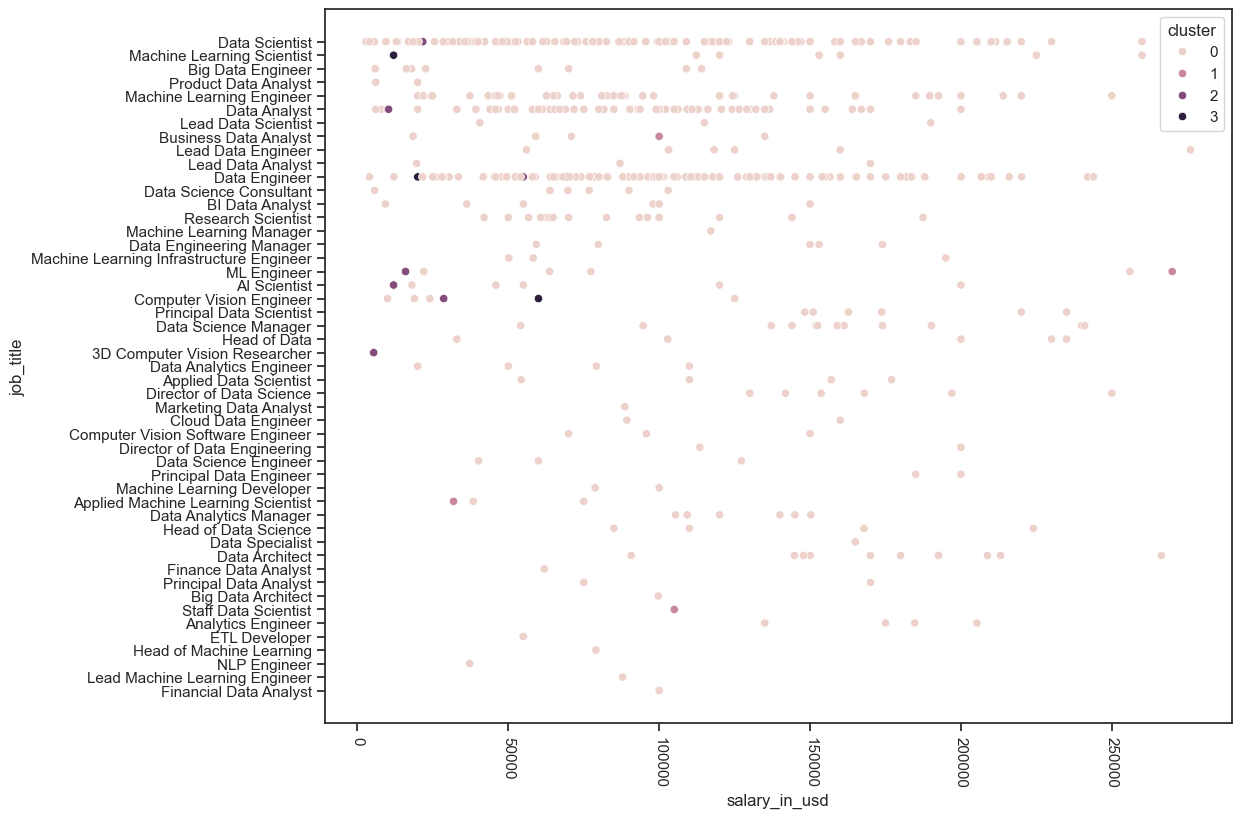

In [50]:
g = sbn.scatterplot(df, y=jub['job_title'], x=df["salary_in_usd"], hue=df["cluster"])
g.tick_params(axis="x", rotation=270)

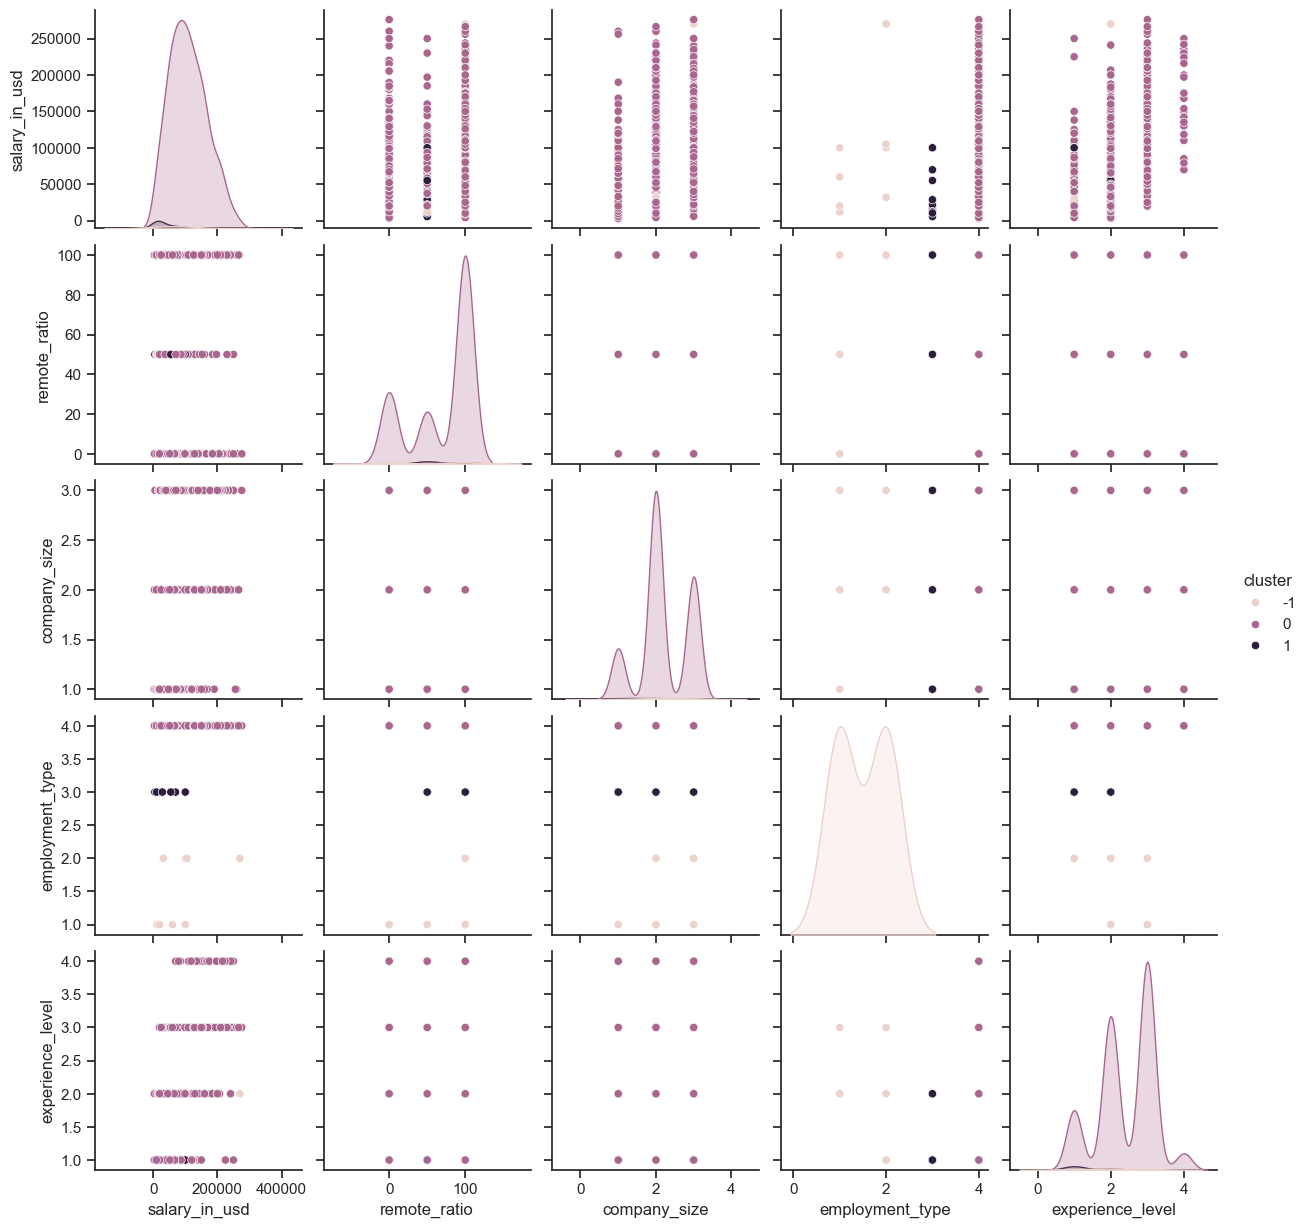

In [40]:
sbn.set(style='ticks', color_codes=True)
sbn.pairplot(df, vars=["salary_in_usd", "remote_ratio", "company_size", "employment_type", "experience_level"], hue='cluster')